https://machinelearningmastery.com/clean-text-machine-learning-python/

## Text Mining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
text = '''20 March 2023
Latitude Financial announced on 16 March 2023 that it had detected unusual activity on its systems which it can now confirm as a sophisticated, well-organised and malicious cyber-attack which remains active.

We recognise the distress to our customers caused by the theft of their personal information and we are committed to transparently updating our customers, partners, employees and the broader community.

Latitude immediately engaged leading external cyber security experts, the Australian Cyber Security Centre, the Australian Federal Police and other relevant Government agencies.

The attack on Latitude is now the subject of an investigation by the Australian Federal Police.

Our people are working around the clock to contain the attackers. We have taken the prudent action of isolating some of our technology platforms which means that we are currently not onboarding new customers.

Because the attack remains active, we have taken our platforms offline and are unable to service our customers and merchant partners. We cannot restore this capability immediately, however we are working to do so gradually over the coming days and ask our customers for their continued patience. Our restoration of these services is aligned to our forensic review.

In conjunction with our cyber-security experts, we are continuing our forensic review of our IT platforms to identify the full extent of the theft of customer information as a result of the attack on Latitude.

So far, Latitude can confirm that:

As previously disclosed, approximately 330,000 customers and applicants have had their personal information stolen
Approximately 96% of the personal information stolen was copies of drivers’ licences or driver licence numbers
Less than 4% was copies of passports or passport numbers
Less than 1% was Medicare numbers
As our review deepens to include non-customer originating platforms and historical customer information, we are likely to uncover more stolen information affecting both current and past Latitude customers and applicants. We will provide a further update when we have more information to share.

Latitude encourages our customers to remain vigilant. We will never contact customers requesting their passwords.

From today, Latitude will commence contacting customers and applicants who have so far been impacted by this criminal act, having already written to all our customers on Thursday 16 March 2023 to alert them to the cyber-attack.

Latitude will confirm to each impacted customer and applicant what personal information has been stolen, what we are doing to support them and what additional steps customers should consider taking to further protect their information. This includes Latitude working with relevant agencies to replace identification documents, where necessary, at no cost to our customers.

We have engaged IDCARE to help support those impacted. IDCARE is a not-for profit organisation and Australia and New Zealand’s national incident response service specialising in providing free, confidential cyber incident information and assistance. Impacted customers and applicants will be able to contact IDCARE during business hours on 1800 595 160.

As of today, Latitude has established dedicated contact centres for impacted customers in Australia and New Zealand to answer queries, as well as a dedicated help page on our website to keep customers and partners fully informed of developments.

Once the cyber-attack is contained, Latitude commits to a review of this incident. This review will help Latitude to most effectively safeguard our customers, partners and platforms, while contributing to the continued fight against cyber-crime on Australian businesses.

Latitude is still assessing the anticipated total cost to it of this incident, including the cost to Latitude of the support we intend to provide our customers as described in this announcement.

Latitude maintains insurance policies to cover risks, including cyber security risks, and we have notified our insurers in respect of the incident.

Latitude Financial Services CEO Ahmed Fahour said:
“I sincerely apologise to our customers and partners for the distress and inconvenience this criminal act has caused. I understand fully the wider concern that this cyber-attack has created within the community.

“Our focus is on protecting the ongoing security of our customers, partners and employees’ personal and identity information, while also doing everything we can to support customers and applicants who have had information stolen.

“While we continue to deliver transactional services, some functionality has been affected resulting in disruption. We are working extremely hard to restore full services to our customers and merchant partners and thank them for their patience and support. We understand their frustration. Customers should refer to Latitude’s website for regular updates.”

Media contact
Mark Gardy
Mark.Gardy@latitudefinancial.com
+61 412 376 817

Latitude strongly advises all Australian and New Zealand citizens to regulary change passwords of important financial accounts.

There are immediate precautions that you can take to protect your identity and personal information:

You can contact one of Australia’s three credit reporting bodies to obtain your credit report so you can confirm if your identity has been used to obtain credit without your knowledge.
You can also request the credit reporting bodies to place a credit ban on your credit file via their website or by contacting them directly. If you intend to apply for a credit ban, please be aware that you will not be able to apply for credit while the ban is in place.
Credit Reporting Agency	Website
Illion	AU: illion.com.au/credit-report-ban-request/
NZ dbcsprodaecdn.azureedge.net/web/themes/cycnz/ assets/static/SuppressionRequestFormCYCNZ.pdf
Equifax	AU www.equifax.com.au/eform/submit/credit-ban
NZ equifax.co.nz/credit-file-suppression
Experian	experian.com.au/consumer/request-a-ban
Centrix	centrix.co.nz/my-credit-score/suppress-your-credit-file/
You can refer to Australian Government information on how you can protect yourself at cyber.gov.au or to Office of the Privacy Commissioner for information on how you can protect yourself at privacy.org.nz

You should be alert for any phishing scams that may be sent via SMS, phone, email or post.

You should always verify the sender of the communications you receive to ensure they are legitimate.

You should never click on links contained in SMS or email messages unless you know they are legitimate.

You should be careful when opening or responding to texts from unknown or suspicious numbers.

You should be careful when answering calls from private numbers or callers originating from unusual geographic locations.

You should regularly update your passwords and ensure you are using strong passwords. Also use multi-factor authentication where possible.

'''

### Split into Sentences

In [3]:
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[0])

20 March 2023
Latitude Financial announced on 16 March 2023 that it had detected unusual activity on its systems which it can now confirm as a sophisticated, well-organised and malicious cyber-attack which remains active.


### Split into Words

In [4]:
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens[:100])

['20', 'March', '2023', 'Latitude', 'Financial', 'announced', 'on', '16', 'March', '2023', 'that', 'it', 'had', 'detected', 'unusual', 'activity', 'on', 'its', 'systems', 'which', 'it', 'can', 'now', 'confirm', 'as', 'a', 'sophisticated', ',', 'well-organised', 'and', 'malicious', 'cyber-attack', 'which', 'remains', 'active', '.', 'We', 'recognise', 'the', 'distress', 'to', 'our', 'customers', 'caused', 'by', 'the', 'theft', 'of', 'their', 'personal', 'information', 'and', 'we', 'are', 'committed', 'to', 'transparently', 'updating', 'our', 'customers', ',', 'partners', ',', 'employees', 'and', 'the', 'broader', 'community', '.', 'Latitude', 'immediately', 'engaged', 'leading', 'external', 'cyber', 'security', 'experts', ',', 'the', 'Australian', 'Cyber', 'Security', 'Centre', ',', 'the', 'Australian', 'Federal', 'Police', 'and', 'other', 'relevant', 'Government', 'agencies', '.', 'The', 'attack', 'on', 'Latitude', 'is', 'now']


### Convert to lower case

In [5]:
# convert to lower case
tokens = [w.lower() for w in tokens]
print(tokens[:100])

['20', 'march', '2023', 'latitude', 'financial', 'announced', 'on', '16', 'march', '2023', 'that', 'it', 'had', 'detected', 'unusual', 'activity', 'on', 'its', 'systems', 'which', 'it', 'can', 'now', 'confirm', 'as', 'a', 'sophisticated', ',', 'well-organised', 'and', 'malicious', 'cyber-attack', 'which', 'remains', 'active', '.', 'we', 'recognise', 'the', 'distress', 'to', 'our', 'customers', 'caused', 'by', 'the', 'theft', 'of', 'their', 'personal', 'information', 'and', 'we', 'are', 'committed', 'to', 'transparently', 'updating', 'our', 'customers', ',', 'partners', ',', 'employees', 'and', 'the', 'broader', 'community', '.', 'latitude', 'immediately', 'engaged', 'leading', 'external', 'cyber', 'security', 'experts', ',', 'the', 'australian', 'cyber', 'security', 'centre', ',', 'the', 'australian', 'federal', 'police', 'and', 'other', 'relevant', 'government', 'agencies', '.', 'the', 'attack', 'on', 'latitude', 'is', 'now']


### Remove punctuation

In [6]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
print(stripped[:100])

['20', 'march', '2023', 'latitude', 'financial', 'announced', 'on', '16', 'march', '2023', 'that', 'it', 'had', 'detected', 'unusual', 'activity', 'on', 'its', 'systems', 'which', 'it', 'can', 'now', 'confirm', 'as', 'a', 'sophisticated', '', 'wellorganised', 'and', 'malicious', 'cyberattack', 'which', 'remains', 'active', '', 'we', 'recognise', 'the', 'distress', 'to', 'our', 'customers', 'caused', 'by', 'the', 'theft', 'of', 'their', 'personal', 'information', 'and', 'we', 'are', 'committed', 'to', 'transparently', 'updating', 'our', 'customers', '', 'partners', '', 'employees', 'and', 'the', 'broader', 'community', '', 'latitude', 'immediately', 'engaged', 'leading', 'external', 'cyber', 'security', 'experts', '', 'the', 'australian', 'cyber', 'security', 'centre', '', 'the', 'australian', 'federal', 'police', 'and', 'other', 'relevant', 'government', 'agencies', '', 'the', 'attack', 'on', 'latitude', 'is', 'now']


In [7]:
# Another way to remove punctuation
# from nltk.tokenize import RegexpTokenizer

# tokenizer = RegexpTokenizer(r'\w+')

# text1 = tokenizer.tokenize('Hello! Its me#$%!')
# text1 = ' '.join(word for word in text1)
# text1

In [8]:
# Ref: https://github.com/khuyentran1401/Web-scrape-Ghibli-Movie-Database/blob/master/Web%20scrape%20Ghibli%20Movie%20DB-3.ipynb
# Another way to remove punctuation

#remove punctuation
# print(string.punctuation)

# def remove_punctuation(text):
#   no_punct = ''.join([c for c in text if c not in string.punctuation])
#   return no_punct

# print(remove_punctuation(text))

### Remove non-alphabetic words

In [9]:
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
print(words[:100])

['march', 'latitude', 'financial', 'announced', 'on', 'march', 'that', 'it', 'had', 'detected', 'unusual', 'activity', 'on', 'its', 'systems', 'which', 'it', 'can', 'now', 'confirm', 'as', 'a', 'sophisticated', 'wellorganised', 'and', 'malicious', 'cyberattack', 'which', 'remains', 'active', 'we', 'recognise', 'the', 'distress', 'to', 'our', 'customers', 'caused', 'by', 'the', 'theft', 'of', 'their', 'personal', 'information', 'and', 'we', 'are', 'committed', 'to', 'transparently', 'updating', 'our', 'customers', 'partners', 'employees', 'and', 'the', 'broader', 'community', 'latitude', 'immediately', 'engaged', 'leading', 'external', 'cyber', 'security', 'experts', 'the', 'australian', 'cyber', 'security', 'centre', 'the', 'australian', 'federal', 'police', 'and', 'other', 'relevant', 'government', 'agencies', 'the', 'attack', 'on', 'latitude', 'is', 'now', 'the', 'subject', 'of', 'an', 'investigation', 'by', 'the', 'australian', 'federal', 'police', 'our', 'people']


### Remove stop words

In [10]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['march', 'latitude', 'financial', 'announced', 'march', 'detected', 'unusual', 'activity', 'systems', 'confirm', 'sophisticated', 'wellorganised', 'malicious', 'cyberattack', 'remains', 'active', 'recognise', 'distress', 'customers', 'caused', 'theft', 'personal', 'information', 'committed', 'transparently', 'updating', 'customers', 'partners', 'employees', 'broader', 'community', 'latitude', 'immediately', 'engaged', 'leading', 'external', 'cyber', 'security', 'experts', 'australian', 'cyber', 'security', 'centre', 'australian', 'federal', 'police', 'relevant', 'government', 'agencies', 'attack', 'latitude', 'subject', 'investigation', 'australian', 'federal', 'police', 'people', 'working', 'around', 'clock', 'contain', 'attackers', 'taken', 'prudent', 'action', 'isolating', 'technology', 'platforms', 'means', 'currently', 'onboarding', 'new', 'customers', 'attack', 'remains', 'active', 'taken', 'platforms', 'offline', 'unable', 'service', 'customers', 'merchant', 'partners', 'restor

### Lemmatisation

In [11]:
# Lemmatize the tokens
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in words]
print(lemmatized_tokens[:100])

['march', 'latitude', 'financial', 'announced', 'march', 'detected', 'unusual', 'activity', 'system', 'confirm', 'sophisticated', 'wellorganised', 'malicious', 'cyberattack', 'remains', 'active', 'recognise', 'distress', 'customer', 'caused', 'theft', 'personal', 'information', 'committed', 'transparently', 'updating', 'customer', 'partner', 'employee', 'broader', 'community', 'latitude', 'immediately', 'engaged', 'leading', 'external', 'cyber', 'security', 'expert', 'australian', 'cyber', 'security', 'centre', 'australian', 'federal', 'police', 'relevant', 'government', 'agency', 'attack', 'latitude', 'subject', 'investigation', 'australian', 'federal', 'police', 'people', 'working', 'around', 'clock', 'contain', 'attacker', 'taken', 'prudent', 'action', 'isolating', 'technology', 'platform', 'mean', 'currently', 'onboarding', 'new', 'customer', 'attack', 'remains', 'active', 'taken', 'platform', 'offline', 'unable', 'service', 'customer', 'merchant', 'partner', 'restore', 'capability

### Stemming

In [12]:
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed_tokens = [porter.stem(word) for word in words]
print(stemmed_tokens[:100])

['march', 'latitud', 'financi', 'announc', 'march', 'detect', 'unusu', 'activ', 'system', 'confirm', 'sophist', 'wellorganis', 'malici', 'cyberattack', 'remain', 'activ', 'recognis', 'distress', 'custom', 'caus', 'theft', 'person', 'inform', 'commit', 'transpar', 'updat', 'custom', 'partner', 'employe', 'broader', 'commun', 'latitud', 'immedi', 'engag', 'lead', 'extern', 'cyber', 'secur', 'expert', 'australian', 'cyber', 'secur', 'centr', 'australian', 'feder', 'polic', 'relev', 'govern', 'agenc', 'attack', 'latitud', 'subject', 'investig', 'australian', 'feder', 'polic', 'peopl', 'work', 'around', 'clock', 'contain', 'attack', 'taken', 'prudent', 'action', 'isol', 'technolog', 'platform', 'mean', 'current', 'onboard', 'new', 'custom', 'attack', 'remain', 'activ', 'taken', 'platform', 'offlin', 'unabl', 'servic', 'custom', 'merchant', 'partner', 'restor', 'capabl', 'immedi', 'howev', 'work', 'gradual', 'come', 'day', 'ask', 'custom', 'continu', 'patienc', 'restor', 'servic', 'align', '

In [13]:
len(words)

553

### Compare between lemmatisation and stemming

#### Lemmatisation

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist(lemmatized_tokens)

In [15]:
most_common = fdist.most_common(20)
most_common

[('customer', 26),
 ('latitude', 19),
 ('information', 15),
 ('credit', 9),
 ('partner', 7),
 ('personal', 6),
 ('australian', 6),
 ('service', 6),
 ('applicant', 6),
 ('platform', 5),
 ('review', 5),
 ('stolen', 5),
 ('number', 5),
 ('contact', 5),
 ('impacted', 5),
 ('support', 5),
 ('incident', 5),
 ('confirm', 4),
 ('cyberattack', 4),
 ('cyber', 4)]

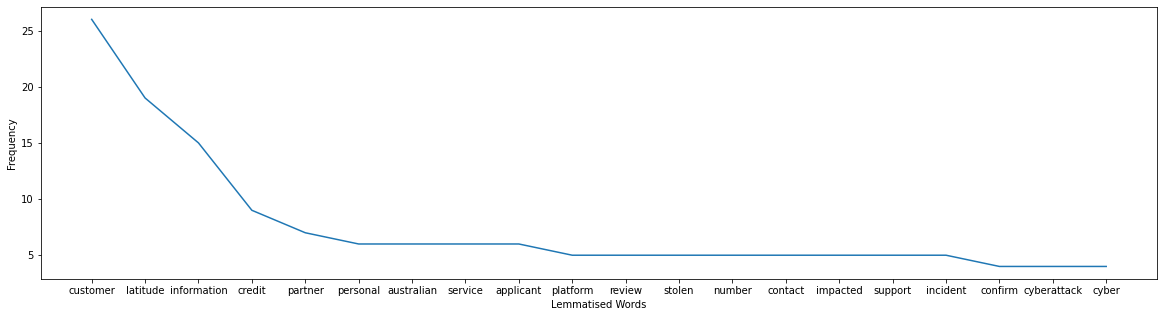

In [16]:
# Visualise with matplotlib
plt.figure(figsize=(20,5))
plt.plot([word[0] for word in most_common], [word[1] for word in most_common])
plt.plot()
plt.xlabel('Lemmatised Words')
plt.ylabel('Frequency')
plt.show()

#### Stemming

In [17]:
fdist = FreqDist(stemmed_tokens)

In [18]:
most_common = fdist.most_common(20)
most_common

[('custom', 26),
 ('latitud', 19),
 ('inform', 16),
 ('credit', 9),
 ('partner', 7),
 ('contact', 7),
 ('person', 6),
 ('australian', 6),
 ('servic', 6),
 ('applic', 6),
 ('platform', 5),
 ('review', 5),
 ('stolen', 5),
 ('number', 5),
 ('impact', 5),
 ('support', 5),
 ('protect', 5),
 ('incid', 5),
 ('confirm', 4),
 ('cyberattack', 4)]

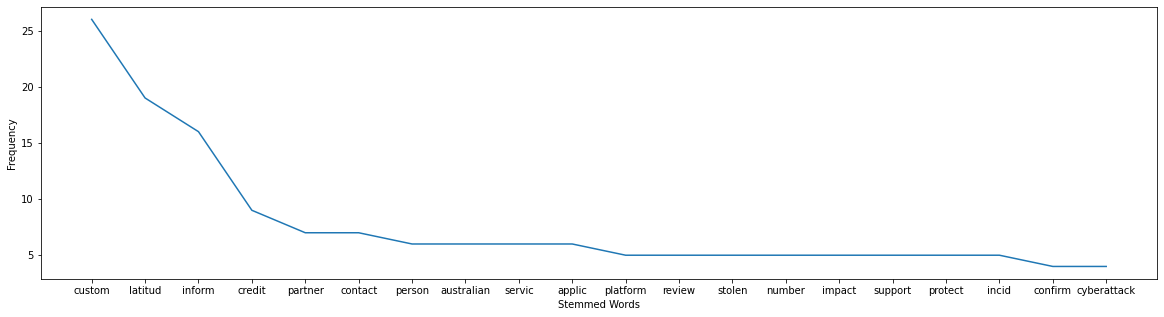

In [19]:
# Visualise with matplotlib
plt.figure(figsize=(20,5))
plt.plot([word[0] for word in most_common], [word[1] for word in most_common])
plt.plot()
plt.xlabel('Stemmed Words')
plt.ylabel('Frequency')
plt.show()

### Get Frequency of words before lemmatisation

In [20]:
fdist = FreqDist(word for word in words)

In [21]:
# Most common words
most_common = fdist.most_common(10)
print(most_common) 

[('customers', 23), ('latitude', 19), ('information', 15), ('credit', 9), ('partners', 7), ('personal', 6), ('australian', 6), ('platforms', 5), ('review', 5), ('applicants', 5)]


In [22]:
# Total number of unique words
unique_words = len(fdist)
print(unique_words)

325


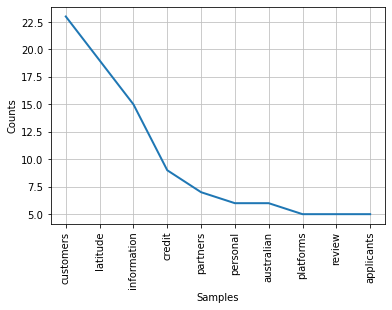

In [23]:
# Plot a frequency distribution graph of 10 most common words
fdist.plot(10)
plt.show()

### Get all files in the Statements folder

In [24]:
import glob
import os

folder_path = "Statements"  # Replace with the path to your folder

# Get all file paths in the folder
file_paths = glob.glob(folder_path + "/*")

all_files = []
# Iterate over the file paths and print their names
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    all_files.append(file_name)
print(all_files)

['2019.02.25 Melbourne Heart Group.txt', '2019.05.24 Canva.txt', '2020.05.28 Service NSW.txt', '2021.02.05 Ambulance Tasmania.txt', '2021.03.17 Eastern Health.txt', '2021.11.16 Frontier.txt', '2022.00.00 CSBS (Ctars).txt', '2022.05.04 National Tertiary Education Union.txt', '2022.05.15 Ctars.txt', '2022.09.12 Telstra.txt', '2022.09.20 Optus.txt', '2022.10.14 MyDeal (Woolworths Group).txt', '2022.11.22 The Smith Family (Twitter).txt', '2022.11.22 The Smith Family.txt', '2022.11.30 GoTo.txt', '2022.12.13 iinet (TPG).txt', '2022.12.20 Medlab Pathology.txt', '2023.03.16 iph.txt', '2023.03.20 Latitude.txt', '2023.05.19 Ambulance Victoria.txt']


### Read each file / statement into a string

In [25]:
def read_file_as_string(file_path):
    with open('Statements/'+file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        text = ' '.join(lines).replace("\n", "")
    return text

In [26]:
from datetime import datetime

statements = []
companies = []
dates = []
years = []

# Function to format date
def format_date(date):
    # Get date
    date_str = date

    # Convert the date string to a datetime object
    try:
        date_obj = datetime.strptime(date_str, "%Y.%m.%d")
        # Convert the datetime object to the desired format
        formatted_date = date_obj.strftime("%d/%m/%Y")
        return formatted_date
    except ValueError:
        return None  

for file_name in all_files:
    # Get statement
    statements.append(read_file_as_string(file_name))
    # Get company name from file name
    companies.append(file_name[11:-4])
    
    # Transform date into correct datetime format
    date = file_name[:10]
    formatted_date = format_date(date)
    dates.append(formatted_date)
    
    # Get year
    year = file_name[:4]
    years.append(year)

In [27]:
data = {'Company': companies, 'NotificationDate': dates, 'Year': years, 'Statement': statements}
df = pd.DataFrame(data=data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           20 non-null     object
 1   NotificationDate  19 non-null     object
 2   Year              20 non-null     object
 3   Statement         20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


,Company,NotificationDate,Year,Statement
0,Melbourne Heart Group,25/02/2019,2019,Melbourne Heart Group wishes to advise all our...
1,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation..."
2,Service NSW,28/05/2020,2020,The investigation into the cyber attack is pro...
3,Ambulance Tasmania,05/02/2021,2021,Ambulance Tasmania is committed to the privacy...
4,Eastern Health,17/03/2021,2021,"Late on Tuesday, Eastern Health has experience..."


### Feature Engineering - Length / Count of words in the statement

In [28]:
df['Length'] = df['Statement'].apply(lambda x: len(x.split()))

In [29]:
sum(df['Length']) / 20

473.7

### Text Preprocessing

In [30]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    # split into sentences
    sentences = sent_tokenize(text)
    
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in words]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [31]:
df['CleanStatement'] = df['Statement'].apply(lambda x: preprocess(x))

In [32]:
df.head()

,Company,NotificationDate,Year,Statement,Length,CleanStatement
0,Melbourne Heart Group,25/02/2019,2019,Melbourne Heart Group wishes to advise all our...,81,melbourne heart group wish advise patient cybe...
1,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation...",847,june aest following investigation cyber securi...
2,Service NSW,28/05/2020,2020,The investigation into the cyber attack is pro...,167,investigation cyber attack progressing team fo...
3,Ambulance Tasmania,05/02/2021,2021,Ambulance Tasmania is committed to the privacy...,272,ambulance tasmania committed privacy confident...
4,Eastern Health,17/03/2021,2021,"Late on Tuesday, Eastern Health has experience...",102,late tuesday eastern health experienced cyber ...


### Get sentiment using SiEBERT - English-Language Sentiment Classification

In [33]:
# Ref: https://huggingface.co/siebert/sentiment-roberta-large-english

from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
# print(sentiment_analysis("I love this!"))

In [34]:
# Create a function to get sentiment
def get_sentiment(text):
    sentences = sent_tokenize(text)

    sent_dict = {'Positive': 0, 'Negative': 0}

    for sentence in sentences:
        # Get sentiment for each sentence in the statement
        sentiment = sentiment_analysis(sentence)   
        if sentiment[0]['label'] == 'NEGATIVE':
            sent_dict['Negative'] += 1
        else: 
            sent_dict['Positive'] += 1
    # Check Positive or Negative has higher values
    if sent_dict['Positive'] > sent_dict['Negative']:
        return 1
    else:
        return 0

In [35]:
# df['Siebert_Sentiment'] = df['Statement'].apply(lambda x: get_sentiment(x))

In [36]:
df['Siebert_Sentiment'].value_counts()

1    11
0     9
Name: Siebert_Sentiment, dtype: int64

In [37]:
df.head()

,Company,NotificationDate,Year,Statement,Length,CleanStatement,Siebert_Sentiment
0,Melbourne Heart Group,25/02/2019,2019,Melbourne Heart Group wishes to advise all our...,81,melbourne heart group wish advise patient cybe...,1
1,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation...",847,june aest following investigation cyber securi...,0
2,Service NSW,28/05/2020,2020,The investigation into the cyber attack is pro...,167,investigation cyber attack progressing team fo...,1
3,Ambulance Tasmania,05/02/2021,2021,Ambulance Tasmania is committed to the privacy...,272,ambulance tasmania committed privacy confident...,1
4,Eastern Health,17/03/2021,2021,"Late on Tuesday, Eastern Health has experience...",102,late tuesday eastern health experienced cyber ...,0


In [38]:
# df.to_excel('output.xlsx', index=False)

In [39]:
# df.drop(['CleanStatement2'], axis=1, inplace=True)

In [40]:
# initialize NLTK sentiment analyzer
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()

# # create get_sentiment function
# def get_sentiment(text):
#     scores = analyzer.polarity_scores(text)
#     sentiment = 1 if scores['pos'] > 0 else 0
#     return sentiment